<a href="https://colab.research.google.com/github/mauroemartinez/HSK_Vocabulary/blob/main/HSK_Vocabulary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 汉语 书平 考试 1 - 6 级 词汇表 数据分析

---


# HSK (Chinese Proficiency Exam) 1 - 6 Vocabulary List

By this project we would like to help students know the importance of each initial and character driven by the frequency of apparitions on the HSK vocabulary, which does not inform directly, but subtly.
Our database will be each .xlsx and .csv files downloaded from the website https://www.purpleculture.net/textbook-vocab-lists/
We will need to concatenate all the files. In order to do that, we need to see if columns are the same between the six files. If not, we will have to transform the data until every file is compatible with each other.
After concatenation, we will need to **split every word/phrase into single characters. Thus, allowing us to count the frequency of each character.**
A bar chart will be the cherry-on-top for the project, allowing the visualization of the data ordered from top most frequent to least frequent character.


# Importation of libraries, Google Drive mounting and databases importation

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
hsk1 = pd.read_csv(r'/content/drive/MyDrive/HSK Vocabulary List/Vocabulary List for New HSK Level 1 (150 words).csv')
hsk2 = pd.read_csv(r'/content/drive/MyDrive/HSK Vocabulary List/Vocabulary List for New HSK Level 2 (151 words).csv')
hsk3 = pd.read_csv(r'/content/drive/MyDrive/HSK Vocabulary List/Vocabulary List for New HSK Level 3 (300 words).csv')
hsk4 = pd.read_csv(r'/content/drive/MyDrive/HSK Vocabulary List/Vocabulary List for New HSK Level 4 (600 words).csv')
hsk5 = pd.read_csv(r'/content/drive/MyDrive/HSK Vocabulary List/Vocabulary List for New HSK Level 5 (1300 words).csv')
hsk6 = pd.read_csv(r'/content/drive/MyDrive/HSK Vocabulary List/Vocabulary List for New HSK Level 6 (2500 words).csv')

# Agrega la columna 'HSK' a cada DataFrame
hsk1['HSK'] = 1
hsk2['HSK'] = 2
hsk3['HSK'] = 3
hsk4['HSK'] = 4
hsk5['HSK'] = 5
hsk6['HSK'] = 6

# Concatena los DataFrames en uno solo
df = pd.concat([hsk1, hsk2, hsk3, hsk4, hsk5, hsk6], ignore_index=True)
df

,ID,Chinese,Trad.,Pinyin,English Definition,HSK,Unnamed: 0,Unnamed: 6
0,1,爱,愛,ài,love,1,NaN,NaN
1,2,八,八,bā,eight,1,NaN,NaN
2,3,爸爸,爸爸,bà ba,Dad,1,NaN,NaN
3,4,杯子,杯子,bēi zi,cup; glass,1,NaN,NaN
4,5,北京,北京,běi jīng,Beijing,1,NaN,NaN
...,...,...,...,...,...,...,...,...
4996,2496,作废,作廢,zuò fèi,cancellation; delete; to nullify; to expire an...,6,NaN,NaN
4997,2497,作风,作風,zuò fēng,work style; way,6,NaN,NaN
4998,2498,作息,作息,zuò xī,work and rest,6,NaN,NaN
4999,2499,座右铭,座右銘,zuò yòu míng,motto,6,NaN,NaN


# Preprocessing

In [ ]:
# Drop first and NaN columns
df = df.dropna(axis=1).iloc[:,1:]
df

,Chinese,Trad.,Pinyin,English Definition,HSK
0,爱,愛,ài,love,1
1,八,八,bā,eight,1
2,爸爸,爸爸,bà ba,Dad,1
3,杯子,杯子,bēi zi,cup; glass,1
4,北京,北京,běi jīng,Beijing,1
...,...,...,...,...,...
4996,作废,作廢,zuò fèi,cancellation; delete; to nullify; to expire an...,6
4997,作风,作風,zuò fēng,work style; way,6
4998,作息,作息,zuò xī,work and rest,6
4999,座右铭,座右銘,zuò yòu míng,motto,6


In [ ]:
# Rename columns with more suitable labels
columns_mapping = {
    'Chinese': 'Simplified',
    'Trad.': 'Traditional',
    'English Definition': 'English Translation'
}
df = df.rename(columns=columns_mapping)

#Delete empty columns
df = df.dropna(axis=1, how='all')
df

,Simplified,Traditional,Pinyin,English Translation,HSK
0,爱,愛,ài,love,1
1,八,八,bā,eight,1
2,爸爸,爸爸,bà ba,Dad,1
3,杯子,杯子,bēi zi,cup; glass,1
4,北京,北京,běi jīng,Beijing,1
...,...,...,...,...,...
4996,作废,作廢,zuò fèi,cancellation; delete; to nullify; to expire an...,6
4997,作风,作風,zuò fēng,work style; way,6
4998,作息,作息,zuò xī,work and rest,6
4999,座右铭,座右銘,zuò yòu míng,motto,6


# New dataframe for frequency calculation

In [ ]:
# We need to split the Simplified column into rows by hanzi, so we can count each character's frequency
# Let's do it in a new df which will be a copy of the original one
df_hsk_freq = df.copy()

#String split into a list per row with the split characters
import re
df_hsk_freq['Simplified'] = df_hsk_freq['Simplified'].apply(
    lambda x : re.findall('.{1,1}', x))

#Explode the dataset, it means to split every element of the lists into a different row
df_hsk_freq = df_hsk_freq.explode('Simplified')
df_hsk_freq

,Simplified,Traditional,Pinyin,English Translation,HSK
0,爱,愛,ài,love,1
1,八,八,bā,eight,1
2,爸,爸爸,bà ba,Dad,1
2,爸,爸爸,bà ba,Dad,1
3,杯,杯子,bēi zi,cup; glass,1
...,...,...,...,...,...
4999,座,座右銘,zuò yòu míng,motto,6
4999,右,座右銘,zuò yòu míng,motto,6
4999,铭,座右銘,zuò yòu míng,motto,6
5000,做,做主,zuò zhǔ,decide; take the responsibility for a decision,6


In [ ]:
#Delete the unnecessary columns
df_hsk_freq.iloc[:,:2]
df_hsk_freq = df_hsk_freq
df_hsk_freq

,Simplified,Traditional,Pinyin,English Translation,HSK
0,爱,愛,ài,love,1
1,八,八,bā,eight,1
2,爸,爸爸,bà ba,Dad,1
2,爸,爸爸,bà ba,Dad,1
3,杯,杯子,bēi zi,cup; glass,1
...,...,...,...,...,...
4999,座,座右銘,zuò yòu míng,motto,6
4999,右,座右銘,zuò yòu míng,motto,6
4999,铭,座右銘,zuò yòu míng,motto,6
5000,做,做主,zuò zhǔ,decide; take the responsibility for a decision,6


# Hanzi frequency

In [ ]:
# Font installation or it won't print Chinese characters in charts
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

# Import plotting libraries and font manager
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager
import seaborn as sns

--2023-09-15 19:42:49--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.161.139, 142.251.161.100, 142.251.161.101, ...
Connecting to drive.google.com (drive.google.com)|142.251.161.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/s0r85e7b9ih7r3gn32d29u5j79bvjms0/1694806950000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=39c9da26-ec41-4e1c-982e-9fee05a2a7cd [following]
--2023-09-15 19:42:51--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/s0r85e7b9ih7r3gn32d29u5j79bvjms0/1694806950000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=39c9da26-ec41-4e1c-982e-9fee05a2a7cd
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.250.103.132, 2607:f8b0:4001:c2b::84
Connecting to d

In [ ]:
# Top X character by frequency
top_x = 25
top = df_hsk_freq["Simplified"].value_counts().index[:top_x]
# Print top X so we can check against the barplot
top

Index(['不', '子', '心', '气', '发', '人', '理', '动', '实', '生', '力', '一', '成', '意',
       '分', '事', '大', '得', '体', '公', '行', '然', '时', '无', '手'],
      dtype='object')

In [ ]:
df_hsk_freq_top = df_hsk_freq.Simplified.value_counts().copy()
df_hsk_freq_top = pd.DataFrame(df_hsk_freq_top).iloc[:top_x,:]
df_hsk_freq_top

,Simplified
不,64
子,58
心,41
气,39
发,38
人,34
理,34
动,33
实,33
生,33


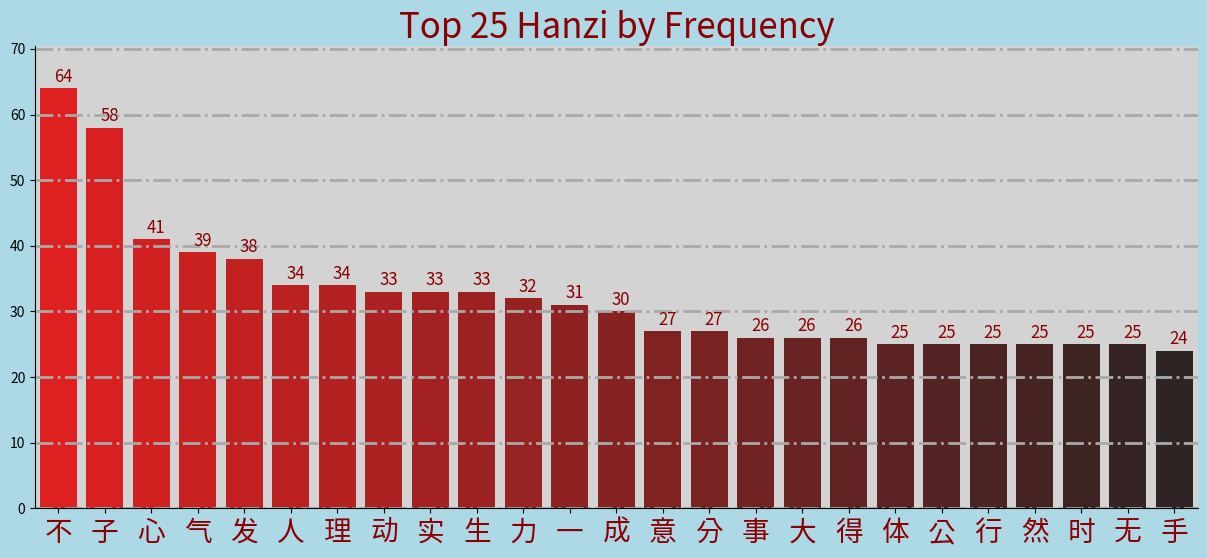

<Figure size 640x480 with 0 Axes>

In [ ]:
# Apply font
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rcParams['font.family'] = 'Taipei Sans TC Beta'

# Barplot filtered by top 15
plt.figure(figsize=(15, 6))
bar_chart = sns.barplot(
    x = df_hsk_freq_top.index,
    y = df_hsk_freq_top.Simplified,
    palette=sns.color_palette("dark:red_r", top_x)
)

# Customize backgrounds
bar_chart.set_facecolor('lightgrey')
bar_chart.grid(which='major', axis="y", linewidth=2, linestyle="-.", color="darkgrey")
plt.gcf().patch.set_facecolor('lightblue')

# Customize title
bar_chart.set_title(
    f'Top {top_x} Hanzi by Frequency',
    fontsize=25,
    fontweight='bold',
    color = "darkred"
)

# Drop the Y label and ticks
bar_chart.set(ylabel=None)

# Drop the X label
bar_chart.set(xlabel=None)

# Set Y limit to be a bit higher than top frequency
max_freq = max(df_hsk_freq_top.Simplified)
bar_chart.set_ylim(0, max_freq * 1.1)

# Customize the X ticks
bar_chart.set_xticklabels(
    top,
    size = 20,
    color = "darkred"
)

# Annotate data labels a bit above each column
for p, label in zip(bar_chart.patches, df_hsk_freq_top.Simplified):
    bar_chart.annotate(
        label,
        (p.get_x()+0.3, p.get_height()+1),
        fontsize=12,
        color="darkred"
    )

sns.despine()
plt.show()

plt.savefig(f"Top {top_x} Hanzi by frequency all HSK vocabulary list.jpg")

The top 2 characters mean "no" and "son" (though not used to address a son, it is an etymological meaning, it is often used in nouns, for example, table 桌子 and chair 椅子), they are both written with three strokes and are the only characters that appear more than fifty times.
The remaining characters, are also simple characters like heart, air, life, strength, person and one.

In [ ]:
#These datasets can lead us to some conclusions
unique = df_hsk_freq.Simplified.nunique()
rows = len(df)
average = len(df_hsk_freq)/rows
average_hsk6 = len(df_hsk_freq[df_hsk_freq['HSK']==6])/len(hsk6)

#Unique quantities per exam
unique_hsk1 = df_hsk_freq[df_hsk_freq['HSK']==1]["Simplified"].nunique()
unique_hsk2 = df_hsk_freq[df_hsk_freq['HSK']==2]["Simplified"].nunique()
unique_hsk3 = df_hsk_freq[df_hsk_freq['HSK']==3]["Simplified"].nunique()
unique_hsk4 = df_hsk_freq[df_hsk_freq['HSK']==4]["Simplified"].nunique()
unique_hsk5 = df_hsk_freq[df_hsk_freq['HSK']==5]["Simplified"].nunique()
unique_hsk6 = df_hsk_freq[df_hsk_freq['HSK']==6]["Simplified"].nunique()


print(f"""Conclusions:

1- Actually, we study {unique:,} distinct hanzi, in a total of {rows:,} words.
2- The average of characters per row is: {average:.2f}.
3- The average of characters per row does not change much from the whole HSK 1-6 vocabulary list to only HSK 6 list since it is {average_hsk6:.2f}.
4- The most frequent characters are beginner friendly.
5- The distinct hanzi qunatity per HSK exam is:

HSK 1 = {unique_hsk1}
HSK 2 = {unique_hsk2}
HSK 3 = {unique_hsk3}
HSK 4 = {unique_hsk4}
HSK 5 = {unique_hsk5}
HSK 6 = {unique_hsk6}
""")

Conclusions:

1- Actually, we study 2,663 distinct hanzi, in a total of 5,001 words.
2- The average of characters per row is: 1.93.
3- The average of characters per row does not change much from the whole HSK 1-6 vocabulary list to only HSK 6 list since it is 2.04.
4- The most frequent characters are beginner friendly.
5- The distinct hanzi qunatity per HSK exam is:

HSK 1 = 174
HSK 2 = 208
HSK 3 = 399
HSK 4 = 716
HSK 5 = 1207
HSK 6 = 2077



<ipython-input-72-9e8acc962d12>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


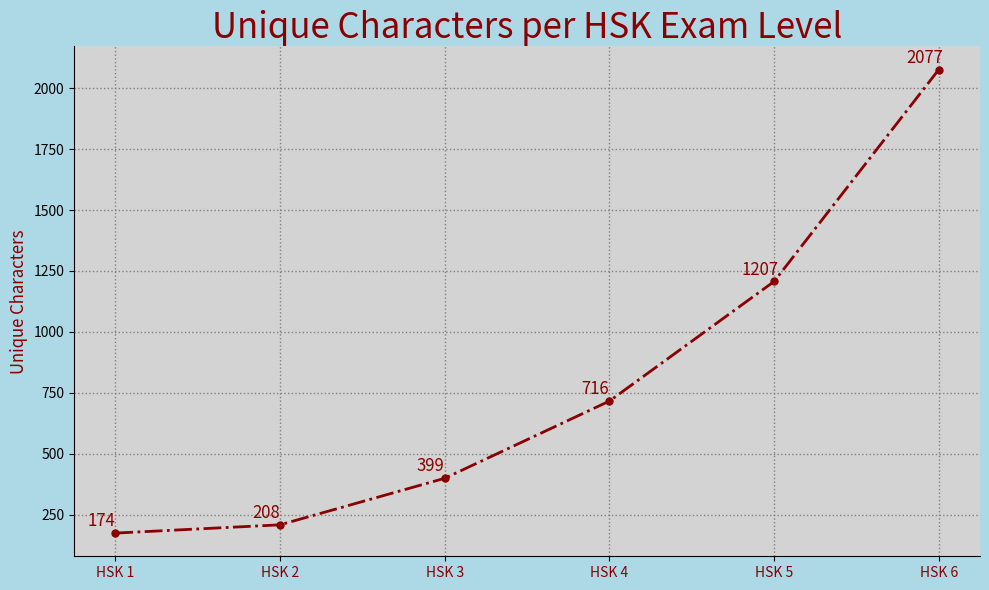

In [72]:
#Let's plot the last inisghts
hsk_levels = ['HSK 1', 'HSK 2', 'HSK 3', 'HSK 4', 'HSK 5', 'HSK 6']
unique_counts = [unique_hsk1, unique_hsk2, unique_hsk3, unique_hsk4, unique_hsk5, unique_hsk6]

# Create a line plot
fig,ax = plt.subplots(figsize=(10, 6))
plt.plot(
    hsk_levels,
    unique_counts,
    marker='o',
    markersize=5,
    color='darkred',
    linestyle='-.',
    linewidth=2
    )

# Customize backgrounds
fig.patch.set_facecolor('lightblue')  # Background color of the figure
ax.set_facecolor('lightgrey')  # Background color of the plot area
ax.grid(which='both', linewidth=1, linestyle=":", color="grey")

plt.xlabel('')
plt.ylabel(
    'Unique Characters',
    fontsize=12,
    color="darkred"
    )
plt.title(
    'Unique Characters per HSK Exam Level',
    fontsize=25,
    fontweight="bold",
    color="darkred"
    )
ax.set_xticklabels(
    hsk_levels,
    color = "darkred"
)

# Annotate data labels a bit above each marker
for x, y in zip(hsk_levels, unique_counts):
    plt.annotate(
        f'{y}',  # Label text
        (x, y),  # Data point coordinates
        textcoords="offset points",  # Offset the label position
        xytext=(-10, 5),  # How much to offset (in points)
        ha='center',  # Horizontal alignment
        fontsize=12,
        color="darkred"
    )

# Display the plot
sns.despine()
plt.tight_layout()
plt.show()